In [1]:
import pandas as pd

# read and drop unavailable data
df = pd.read_csv('new_dataset/train.csv')
df = df.dropna(subset=['tags'])
df

,id,title,article,tags
0,HE-ece4370,Check requests to server from the application ...,<p>Is there a way to find what sort of request...,flash|http|websocket|communication|wireshark
1,HE-fad0d3b,Using Asc offset and desc in psql,<p>This code produces this</p>\r\r\r\r\n\r\r\r...,sql|postgresql|offset
2,HE-ea00013,What to do when you have much permissions with...,<p>I'm planning to use a binary system to hand...,php|permissions|binary|bit-manipulation
3,HE-df1304d,React remove component from list,"<p>Pretty new to React, coming from knockout</...",reactjs
4,HE-e946f8c,RPC with promises for node.js,<p>Are there any RPC modules which work with p...,javascript|node.js|websocket|rpc|promise
...,...,...,...,...
786974,HE-c886785,Android Actionbar doesn't apply custom image b...,"<p>I'm using Android Studio, and I've tried to...",java|android|android-actionbar|manifest
786975,HE-d0e2ad6,"Optimize SQL, same line multiple times in CASE",<p>I've written a SQL Servre stored procedure ...,sql|sql-server|sql-optimization
786976,HE-e4c5f5f,when mysql views are updated / performance,<p>I have created views while joining many hea...,mysql|sql|performance|views
786977,HE-ee64f36,AngularJS controller data from AJAX - does not...,<p>I am using Angular 1.4.7 with <code>angular...,javascript|angularjs|ajax


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/qianx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/qianx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

df['tags']=df['tags'].str.split('|')

# tokenize and extract information from raw text
def cleaner(text):
  # extract paragraph from HTML format
  text = BeautifulSoup(text).get_text()
  text = re.sub("[^a-zA-Z]", " ", text)
  # tokenize text and remove stopwords
  tokens = nltk.word_tokenize(text.lower())
  tokens = [token for token in tokens if token.lower() not in stop_words]
  return tokens


df['article_cleaned'] = df['article'].apply(cleaner)
df['title_cleaned'] = df['title'].apply(cleaner)
df['query'] = df.apply(lambda x: x['title_cleaned']+x['article_cleaned'], axis = 1)
df

/var/folders/sn/7993v0zj7gs_k4v5ydn8s93c0000gn/T/ipykernel_56398/3841115086.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text).get_text()


,id,title,article,tags,article_cleaned,title_cleaned,query
0,HE-ece4370,Check requests to server from the application ...,<p>Is there a way to find what sort of request...,"[flash, http, websocket, communication, wiresh...","[way, find, sort, requests, flash, application...","[check, requests, server, application, written...","[check, requests, server, application, written..."
1,HE-fad0d3b,Using Asc offset and desc in psql,<p>This code produces this</p>\r\r\r\r\n\r\r\r...,"[sql, postgresql, offset]","[code, produces, select, end, date, exhibits, ...","[using, asc, offset, desc, psql]","[using, asc, offset, desc, psql, code, produce..."
2,HE-ea00013,What to do when you have much permissions with...,<p>I'm planning to use a binary system to hand...,"[php, permissions, binary, bit-manipulation]","[planning, use, binary, system, handle, permis...","[much, permissions, binary, system]","[much, permissions, binary, system, planning, ..."
3,HE-df1304d,React remove component from list,"<p>Pretty new to React, coming from knockout</...",[reactjs],"[pretty, new, react, coming, knockout, simplif...","[react, remove, component, list]","[react, remove, component, list, pretty, new, ..."
4,HE-e946f8c,RPC with promises for node.js,<p>Are there any RPC modules which work with p...,"[javascript, node.js, websocket, rpc, promise]","[rpc, modules, work, promises, server, functio...","[rpc, promises, node, js]","[rpc, promises, node, js, rpc, modules, work, ..."
...,...,...,...,...,...,...,...
786974,HE-c886785,Android Actionbar doesn't apply custom image b...,"<p>I'm using Android Studio, and I've tried to...","[java, android, android-actionbar, manifest]","[using, android, studio, tried, add, custom, i...","[android, actionbar, apply, custom, image, bac...","[android, actionbar, apply, custom, image, bac..."
786975,HE-d0e2ad6,"Optimize SQL, same line multiple times in CASE",<p>I've written a SQL Servre stored procedure ...,"[sql, sql-server, sql-optimization]","[written, sql, servre, stored, procedure, sql,...","[optimize, sql, line, multiple, times, case]","[optimize, sql, line, multiple, times, case, w..."
786976,HE-e4c5f5f,when mysql views are updated / performance,<p>I have created views while joining many hea...,"[mysql, sql, performance, views]","[created, views, joining, many, heavy, tables,...","[mysql, views, updated, performance]","[mysql, views, updated, performance, created, ..."
786977,HE-ee64f36,AngularJS controller data from AJAX - does not...,<p>I am using Angular 1.4.7 with <code>angular...,"[javascript, angularjs, ajax]","[using, angular, angular, ui, router, state, r...","[angularjs, controller, data, ajax, always, work]","[angularjs, controller, data, ajax, always, wo..."


In [4]:
# check top 10 frequent tags
freq={}
for i in df['tags']:
    for j in i:
        if j in freq.keys():
            freq[j] = freq[j] + 1
        else:
            freq[j] = 1

freq = dict(sorted(freq.items(), key=lambda x:x[1],reverse=True))
common_tags = list(freq.keys())[:10]
print(common_tags)

['javascript', 'java', 'c#', 'php', 'android', 'python', 'jquery', 'html', 'c++', 'ios']


In [6]:
# save useful data column for future training
df_train = df[['query','tags']]
df_train.to_csv('train_clean.csv',index=False)

/var/folders/sn/7993v0zj7gs_k4v5ydn8s93c0000gn/T/ipykernel_56398/680016876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['tags'] = df_train['tags'].astype(str)


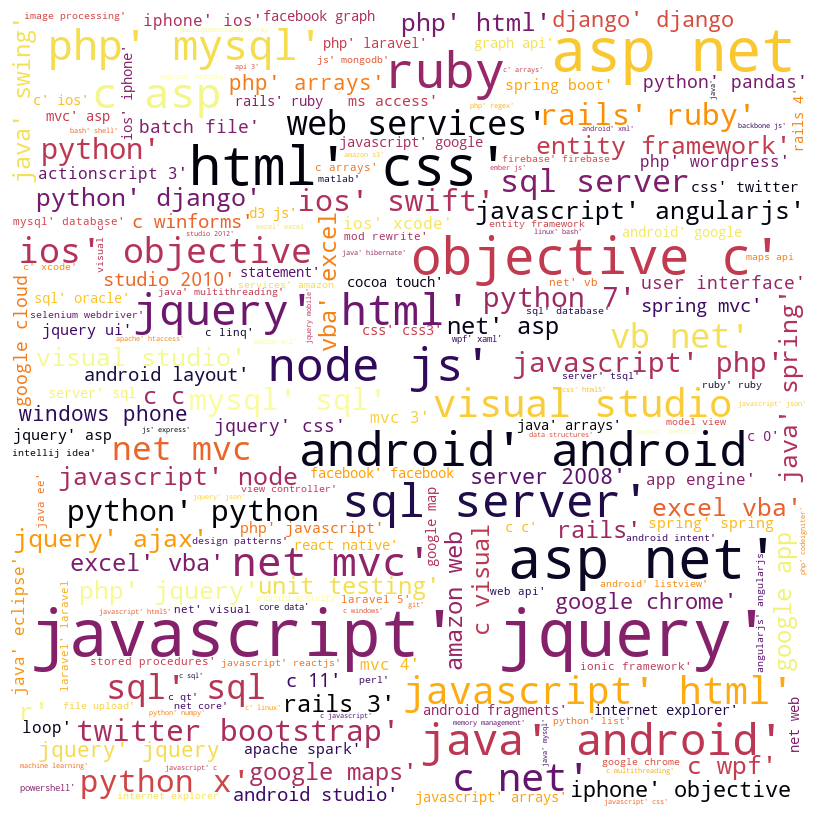

In [15]:
# check tag frequency in wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt  

#TODO：adjustment
df_train['tags'] = df_train['tags'].astype(str)
tags_str = ' '.join(df_train['tags'].tolist())

# generate a word cloud of tags
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='inferno').generate(tags_str)


# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [16]:
df_train.head()

,query,tags
0,"[check, requests, server, application, written...","['flash', 'http', 'websocket', 'communication'..."
1,"[using, asc, offset, desc, psql, code, produce...","['sql', 'postgresql', 'offset']"
2,"[much, permissions, binary, system, planning, ...","['php', 'permissions', 'binary', 'bit-manipula..."
3,"[react, remove, component, list, pretty, new, ...",['reactjs']
4,"[rpc, promises, node, js, rpc, modules, work, ...","['javascript', 'node.js', 'websocket', 'rpc', ..."


## Training set preparation

In [17]:
# initial tabulardataset for training

from torchtext import data
from torchtext.data import TabularDataset, Field
import torch
max_len = 100
TEXT = data.Field(tokenize=cleaner, batch_first=True, fix_length=max_len)
LABEL = data.LabelField(batch_first=True)
fields = [('query',TEXT),('tags', LABEL)]

training_data = TabularDataset(path = 'train_clean.csv', format = 'csv', fields = fields, skip_header = True)
training_data

/Users/qianx/opt/anaconda3/envs/fp/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/qianx/opt/anaconda3/envs/fp/lib/python3.9/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/Users/qianx/opt/anaconda3/envs/fp/lib/python3.9/site-packages/torchtext/data/field.py:150: UserWarning: LabelField class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torcht

In [18]:
print(vars(training_data.examples[0]))

{'query': ['check', 'requests', 'server', 'application', 'written', 'flash', 'way', 'find', 'sort', 'requests', 'flash', 'application', 'send', 'server', 'trying', 'see', 'information', 'client', 'sends', 'server', 'using', 'chrome', 'inspect', 'element', 'shows', 'nothing', 'going', 'sure', 'communication', 'going', 'website', 'interesting', 'http', 'www', 'chesscube', 'com', 'every', 'time', 'make', 'move', 'somehow', 'sends', 'server', 'may', 'another', 'opponent', 'end', 'game', 'sends', 'game', 'server', 'sure', 'till', 'see', 'images', 'uploaded', 'game', 'thanks', 'help', 'p', 'trying', 'use', 'wireshark', 'capture', 'packets', 'way', 'see', 'communication', 'pinging', 'chesscube', 'com', 'realize', 'ip', 'address', 'listening', 'packages', 'ip', 'address', 'ip', 'addr', 'thing', 'see', 'lot', 'tcp', 'http', 'packages', 'http', 'packages', 'sending', 'png', 'images', 'avatars', 'users', 'chat', 'people', 'constantly', 'speaking', 'see', 'understand', 'going', 'another', 'ip', 'a

In [19]:
def fetch_text(examples):
  text=[]
  for example in examples:
    query = vars(example)['query']
    text.append(query) 
  return text


In [20]:
def convert2seq(text):
  text = TEXT.pad(text)
  text = TEXT.numericalize(text)
  return text

In [21]:
def fetch_tags(data):
  tags=[]
  for example in data.examples:
    tags.append(vars(example)['tags'])
  return tags

In [22]:
import random
train_data, valid_data = training_data.split(split_ratio=0.8, random_state = random.seed(32))

TEXT.build_vocab(train_data, min_freq=3)
len(TEXT.vocab)


523464

In [23]:
train_text = fetch_text(train_data)
valid_text = fetch_text(valid_data)

In [24]:
X_train = convert2seq(train_text)
X_valid = convert2seq(valid_text)

In [25]:
train_tags = fetch_tags(train_data)
valid_tags = fetch_tags(valid_data)

In [ ]:
train_tags_list=[i.split(",") for i in train_tags]
valid_tags_list=[i.split(",") for i in valid_tags]

In [27]:
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer

mlb= MultiLabelBinarizer()
mlb.fit(train_tags_list)

y_train  = mlb.transform(train_tags_list)
y_valid  = mlb.transform(valid_tags_list)

y_train = torch.FloatTensor(y_train)
y_valid = torch.FloatTensor(y_valid)

/Users/qianx/opt/anaconda3/envs/fp/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [" '.class-file'", " '.lib'", " '.mov'", " '.net-4.5.2'", " '.net-core-angular']", " '.net-framework-version'", " '.sbr']", " '1wire']", " '2-legged']", " '37-signals'", " '3d-texture'", " '4g'", " '4gl'", " '802.11']", " 'abbyy']", " 'absolutelayout'", " 'accessibility-api']", " 'acsl']", " 'action-interface']", " 'active-hdl']", " 'active-window']", " 'activedirectorymembership']", " 'activescaffold'", " 'activeview']", " 'activex-exe']", " 'activity-finish'", " 'activity-stack'", " 'activitydesigner']", " 'activitygroup'", " 'acts-as-tenant'", " 'acumatica'", " 'adaptive-bitrate']", " 'adaptive-ui'", " 'addressof']", " 'adehabitathr']", " 'adobe-connect']", " 'adobe-native-extensions']", " 'adorner']", " 'ads-api']", " 'adsutil.vbs']", " 'advanced-filter']", " 'advanced-query-tool']", " 'advapi32']", " 'adwords-api-v201109']", " 'adwords-api-v201802']", 

: 

: 

## Model Building

In [ ]:
from torch import nn
from torch.nn import Sequential, Linear,  ReLU, Sigmoid, Dropout, BCELoss, Embedding, RNN, LSTM
import numpy

emb = Embedding(num_embeddings=len(TEXT.vocab), embedding_dim=50)
sample_embedding = emb(X_train[:1])
rnn = RNN(input_size=50, hidden_size=128, batch_first=True, nonlinearity='relu')
hidden_states,last_hidden_state = rnn(sample_embedding)
reshaped = hidden_states.reshape(hidden_states.size(0),-1)

In [ ]:
class Net(nn.Module):
    
    #define all the layers used in model
    def __init__(self):
        
        #Constructor
        super(Net, self).__init__()   
        
        self.rnn_layer = nn.Sequential(
            
            #embedding layer [batch_size,vocab_size]
            Embedding(num_embeddings=len(TEXT.vocab), embedding_dim=50),
        
            #rnn layer [batch_size,100,128]
            RNN(input_size=50, hidden_size=128, nonlinearity='relu',batch_first=True)
          
            )

        self.dense_layer = nn.Sequential(
            
            #[batch_size,100*128]
            Linear(12800, 128),

            ReLU(),

            #[batch_size,128]
            Linear(128,10),
            
            #[batch_size,10]
            Sigmoid()

        )

    def forward(self, x):
        
        #rnn layer
        hidden_states, last_hidden_state = self.rnn_layer(x)

        #reshaping
        hidden_states = hidden_states.reshape(hidden_states.size(0),-1)

        #dense layer
        outputs=self.dense_layer(hidden_states)
        
        return outputs

In [ ]:
model = Net()
model

In [ ]:
optimizer = torch.optim.Adam(model.parameters())
criterion = BCELoss()

# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

## Model Training

In [ ]:
def train(X,y,batch_size):
  model.train()

  epoch_loss= 0
  no_of_batches = 0

  indices= torch.randperm(len(X))

  for i in range(0,len(indices),batch_size):
    
  
    ind = indices[i:i+batch_size]
    batch_x=X[ind]
    batch_y=y[ind]

    if torch.cuda.is_available():
        batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
    optimizer.zero_grad()

    outputs = model(batch_x)
    outputs = outputs.squeeze()
    loss = criterion(outputs, batch_y)
    loss.backward()
    optimizer.step()
    epoch_loss = epoch_loss + loss.item()
    no_of_batches = no_of_batches+1

  return epoch_loss/no_of_batches

In [ ]:
def evaluate(X,y,batch_size):
  model.eval()
  epoch_loss = 0
  no_of_batches = 0
  indices= torch.randperm(len(X))

  with torch.no_grad():
    for i in range(0,len(indices),batch_size):
      ind = indices[i:i+batch_size]

      batch_x= X[ind]
      batch_y= y[ind]
      if torch.cuda.is_available():
          batch_x, batch_y = batch_x.cuda(), batch_y.cuda()

      outputs = model(batch_x)
      outputs = outputs.squeeze()

      loss = criterion(outputs, batch_y)
      epoch_loss = epoch_loss + loss.item()
      no_of_batches = no_of_batches + 1

    return epoch_loss/no_of_batches

In [ ]:
def predict(X,batch_size):
  model.eval()
  predictions = []
  indices = torch.arange(len(X))

  with torch.no_grad():
      for i in range(0, len(X), batch_size):
        ind = indices[i:i+batch_size]
        batch_x = X[ind]

        if torch.cuda.is_available():
            batch_x = batch_x.cuda()

        outputs = model(batch_x)
        outputs = outputs.squeeze()
        prediction = outputs.data.cpu().numpy()
        predictions.append(prediction)

  predictions = np.concatenate(predictions, axis=0)
    
  return predictions

In [ ]:
N_EPOCHS = 10
batch_size = 32

# intialization
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    #train the model
    train_loss   = train(X_train, y_train, batch_size)
    
    #evaluate the model
    valid_loss   = evaluate(X_valid, y_valid, batch_size)

    print('\nEpoch :',epoch,
          'Training loss:',round(train_loss,4),
          '\tValidation loss:',round(valid_loss,4))

    #save the best model
    if best_valid_loss >= valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt') 
        print("\n----------------------------------------------------Saved best model------------------------------------------------------------------")  

In [ ]:
path='saved_weights.pt'
model.load_state_dict(torch.load(path))